In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
sns.set()
%config InlineBackend.figure_format = 'retina'

In [3]:
DATA = 'data'
allFiles = glob.glob(DATA + "/*.csv")
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_)
    list_.append(df)
data = pd.concat(list_)

In [41]:
print('Categories:')
set(data.account_category)

Categories:


{'Commercial',
 'Fearmonger',
 'HashtagGamer',
 'LeftTroll',
 'NewsFeed',
 'NonEnglish',
 'RightTroll',
 'Unknown'}

In [115]:
mask = (data.publish_date.str.contains('2016')
           & data.account_category.isin(['RightTroll', 'LeftTroll']))

In [116]:
troll_data = data.loc[mask]
troll_data.shape

(397159, 15)

There are 397K tweets if you include retweets

In [117]:
troll_data.to_csv('troll_data_2016.csv')

In [118]:
no_rt_mask = mask & ~data.retweet

In [119]:
no_rt_troll_data = data.loc[no_rt_mask]
no_rt_troll_data.shape

(103978, 15)

There are 104K tweets if you don't include retweets

In [ ]:
no_rt_troll_data.to_csv('troll_data_2016_no_rt.csv')

In [120]:
no_rt_troll_data.head()

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
2066,1.504356e+09,GALLOWAYELIANA,#HappyBirthdayMLK Sometimes we just have to mo...,United States,English,1/15/2016 10:32,1/15/2016 10:32,721,289,918,NaN,left,0,0,LeftTroll
2083,1.504356e+09,GALLOWAYELIANA,Be strong and you will change anything you wan...,United States,English,1/26/2016 10:15,1/26/2016 10:15,720,289,933,NaN,left,0,0,LeftTroll
2084,1.504356e+09,GALLOWAYELIANA,#HappyBirthdayAngelaDavis our generation needs...,United States,English,1/26/2016 10:22,1/26/2016 10:23,720,289,935,NaN,left,0,0,LeftTroll
2085,1.504356e+09,GALLOWAYELIANA,#HappyBirthdayAngelaDavis a living inspiration...,United States,English,1/26/2016 10:23,1/26/2016 10:23,720,289,936,NaN,left,0,0,LeftTroll
2463,1.504356e+09,GALLOWAYELIANA,Itâs Huey Newtonâs birthday! One of the #B...,United States,English,2/17/2016 14:36,2/17/2016 14:36,1161,314,946,NaN,left,0,0,LeftTroll


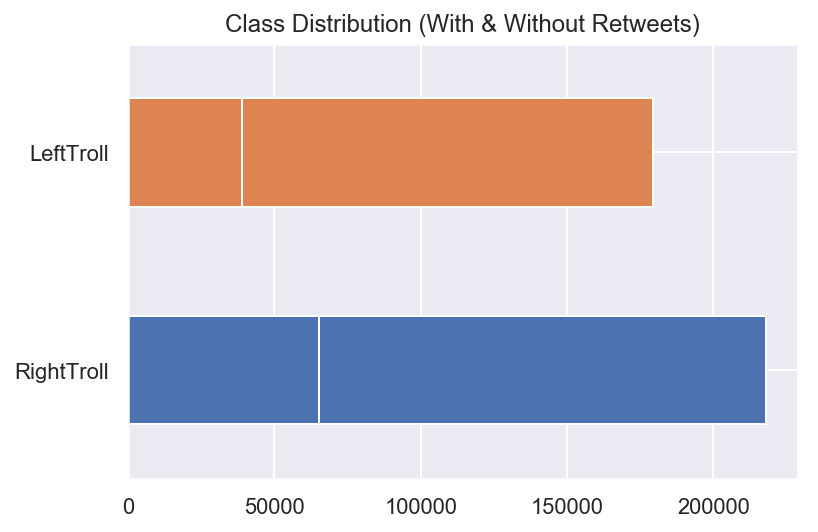

In [132]:
troll_data.account_category.value_counts().plot.barh()
no_rt_troll_data.account_category.value_counts().plot.barh()
plt.title('Class Distribution (With & Without Retweets)')
plt.show()

In [122]:
def print_random_tweet(df, n=1, category='all'):
    if category == 'all':
        print('\n\n'.join(np.random.choice(df.content.values, n)))
    else:
        print('\n\n'.join(np.random.choice(df.loc[df.account_category == category].content.values, n)))

##### Some random tweets from each category

In [123]:
print_random_tweet(no_rt_troll_data, n=5, category='RightTroll')

Scott Baio Has a Message for Hillary Clinton Losers https://t.co/aSq97OtJOp https://t.co/p92eDeuRl2

Secret Santa Pays Off More Than $46K in Layaway Items at Pennsylvania Walmart https://t.co/ubW5cknQSW https://t.co/ORuFAxJocw

.@jadapsmith just allite lost her mind #OscarHasNoColor #Oscars

RT @2AFight: #NRA vindicated by Newtown school board: armed guards. READ > https://t.co/J9hMWwr15x #2A #tcot #tgdn #PJNET https://t.co/uhcYâ¦

#IslamKills Again the heart of Europe being attacked. Stay safe #PrayForBrussels #StopIslam https://t.co/bjU7op3eJL


In [126]:
print_random_tweet(no_rt_troll_data, n=5, category='LeftTroll')

#truth  A #BlackLivesMatter #negro who's fed through a state #fund/#charity firm are bred to take up a street or backup a bad #leadership

tweets and one #KimKardashian photo that nail the reality of periods ï¿½ï¿½ï¿½ #BlackGirlsRock https://t.co/NNcxnLUAWT

Black woman student attacked by three white men at University of California, Davis https://t.co/rGLsxtCtno   #blacknews #blacktwitter

#FridayFeeling #StayWoke #BlackLivesMatter https://t.co/wb2tyKCKJA

Study suggests anti-trans parents may literally be killing their kids  https://t.co/q9thV3ycEF https://t.co/xpKHXHE813


In [127]:
dates = pd.to_datetime(no_rt_troll_data.publish_date)

Text(0.5,1,'# Tweets by Day of Week')

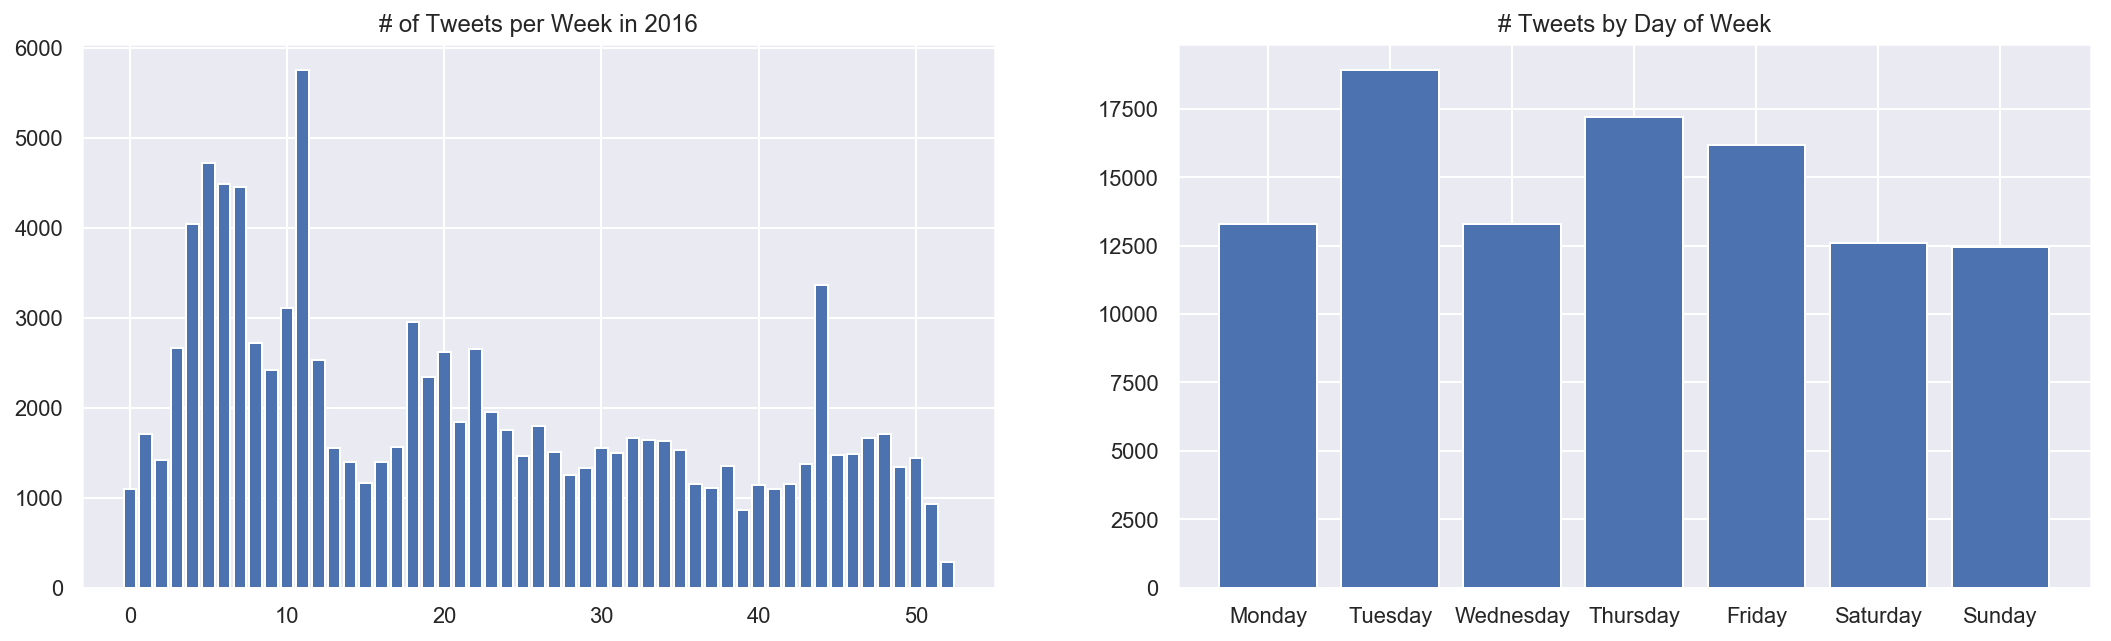

In [168]:
fig, axes = plt.subplots(ncols=2, figsize=(18, 5))
axes[0].bar(list(range(53)), dates.groupby(dates.dt.weekofyear).aggregate('count'))
axes[0].set_title('# of Tweets per Week in 2016')

weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
axes[1].bar(weekday_names, dates.groupby(dates.dt.weekday).aggregate('count'))
axes[1].set_title('# Tweets by Day of Week')